In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

#Creating Dataset

In [2]:
class Data(Dataset):
  def __init__(self):
    self.x = torch.linspace(-2, 2, 40).view(-1, 1)
    self.y = torch.zeros_like(self.x)
    self.y[self.x[:, 0] > 0.5] = 1
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

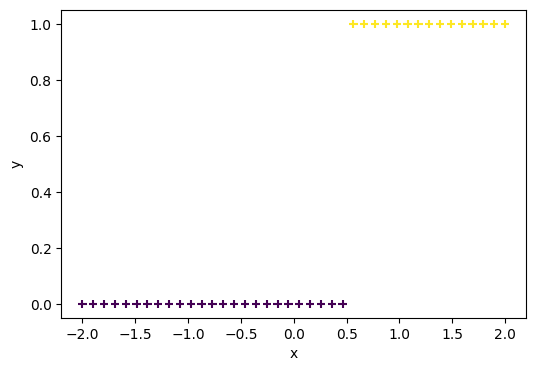

In [3]:
dataset = Data()
plt.figure(figsize=(6, 4))
plt.scatter(dataset.x.numpy(), dataset.y.numpy(), marker='+', c = dataset.y.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
trainloader = DataLoader(dataset, batch_size = 3)

#Model

In [5]:
class Logistic(nn.Module):
  def __init__(self, input_size):
    super(Logistic, self).__init__()
    self.linear = nn.Linear(input_size, 1)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [6]:
def criterion(y, y_hat): #Cross Entropy
  return -1 * torch.mean(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))

In [7]:
model = Logistic(input_size = 1)
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [8]:
epochs = 200
iteration = [i for i in range(epochs)]
cross_entropy = []
def train_model(epochs):
  for epoch in range(epochs):
    Y_hat = model(dataset.x)
    Loss = criterion(dataset.y, Y_hat)
    cross_entropy.append(Loss.detach().numpy())
    for x, y in trainloader:
      y_hat = model(x)
      loss = criterion(y, y_hat)
      optimizer.zero_grad()
      loss.backward(retain_graph=True)
      optimizer.step()

  plt.plot(iteration[5:], cross_entropy[5:])
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.show()

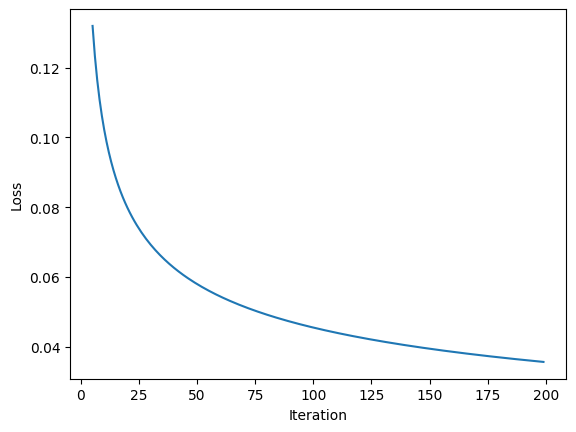

In [9]:
train_model(epochs)